**Lesson 2: Bear classification**

In [36]:
from fastai import *
from fastai.vision import *

In [37]:
folders = ["teddy","grizzly","black"]

**Before running the below cell, upload files: teddy.txt, black.txt and grizzly.txt containing the urls for the images by clicking on the Add data button on the right hand side.**

In [38]:
path = Path('/kaggle/working/bears')
path.mkdir(parents=True, exist_ok=True)
!cp ../input/* {path}/

**Make sure internet radio button is on.**

In [39]:
for folder in folders:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    file = folder + ".txt"
    download_images(path/file, dest, max_pics=200)

In [40]:
from IPython.display import display, HTML
for c in folders:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [41]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),size=64, num_workers=0).normalize(imagenet_stats)

In [42]:
data.classes

['black', 'grizzly', 'teddy']

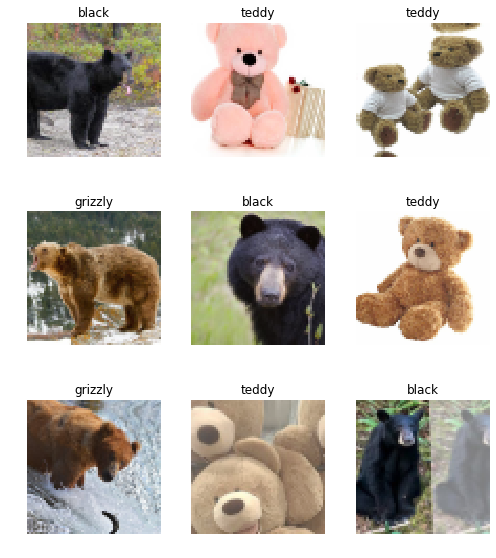

In [43]:
data.show_batch(rows=3, figsize=(7,8))

In [44]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddy'], 3, 224, 56)

In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.422029,0.837173,0.339286,00:06
1,1.065961,0.135398,0.053571,00:06
2,0.830106,0.107844,0.035714,00:06
3,0.699251,0.120798,0.035714,00:06


In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


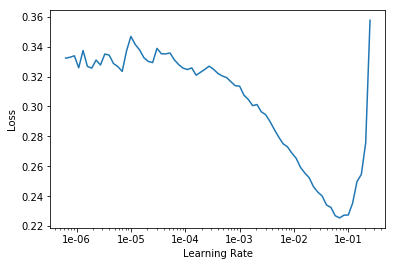

In [48]:
learn.recorder.plot()

**Edit the slice params based on the plot above**

In [49]:
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.307010,0.148373,0.053571,00:06
1,0.266021,0.181942,0.053571,00:06


In [50]:
interp = ClassificationInterpretation.from_learner(learn)

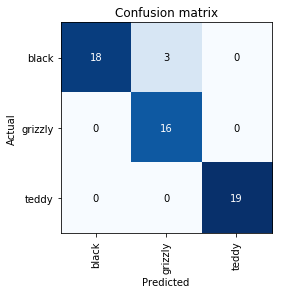

In [51]:
interp.plot_confusion_matrix()

In [52]:
interp.most_confused()

[('black', 'grizzly', 3)]

**Cleaning the dataset**

In [53]:
from fastai.widgets import *

In [54]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [55]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [56]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [57]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())